# Concatinating all genres in one dataset
## An Exploratory Data Analysis and Modeling

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df1 = pd.read_csv('df_pop_cleanedcopy.csv')
df2 = pd.read_csv('df_reggaeton_cleanedcopy.csv')
df3 = pd.read_csv('df_electronic_cleanedcopy.csv')
df4 = pd.read_csv('df_rap_cleanedcopy.csv')
df5 = pd.read_csv('df_classical_cleanedcopy.csv')
df6 = pd.read_csv('df_rock_cleanedcopy.csv')

In [3]:
df_genres= pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)

In [4]:
df_genres.shape

(3942, 27)

In [5]:
# Save the data to a CSV file if result is not empty
if not df_genres.empty:
    csv_filename = 'df_genres.csv'
    df_genres.to_csv(csv_filename, index=False, encoding='utf-8')
    print(f"Data has been saved to {csv_filename}")
else:
    print("No tracks found for the given search queries.")

Data has been saved to df_genres.csv


In [6]:
# Read data from CSV file
df = pd.read_csv("df_genres.csv")

In [7]:
df.shape

(3942, 27)

In [8]:
# Checking averages on my numerical colums
mean_values_of_features = df.groupby('Genre')[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
                                                 'speechiness', 'acousticness', 'instrumentalness',
                                                 'liveness', 'valence', 'tempo', 'duration_minutes',
                                                 'time_signature', 'Release Day', 'Release Month',
                                                 'Release Year']].mean()
print(mean_values_of_features)

            popularity  danceability    energy       key   loudness      mode  \
Genre                                                                           
Classical    19.067961      0.301284  0.139059  4.169903 -21.024403  0.766990   
Electronic   35.998016      0.644364  0.747940  5.507937  -6.493554  0.535714   
Pop          51.703567      0.646961  0.651124  5.258303  -6.800734  0.613776   
Rap          46.529277      0.670387  0.663489  5.332951  -6.557405  0.557979   
Reggaeton    52.343575      0.743578  0.721447  5.427374  -5.228534  0.467877   
Rock         33.123798      0.486382  0.584129  4.790865  -9.900732  0.835337   

            speechiness  acousticness  instrumentalness  liveness   valence  \
Genre                                                                         
Classical      0.046135      0.939597          0.631441  0.162568  0.266356   
Electronic     0.075198      0.097915          0.308986  0.203440  0.440668   
Pop            0.074410      0.1942

In [9]:
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats

Mean values of features sorted in descending order:
Genre
Reggaeton     52.343575
Pop           51.703567
Rap           46.529277
Electronic    35.998016
Rock          33.123798
Classical     19.067961
Name: popularity, dtype: float64


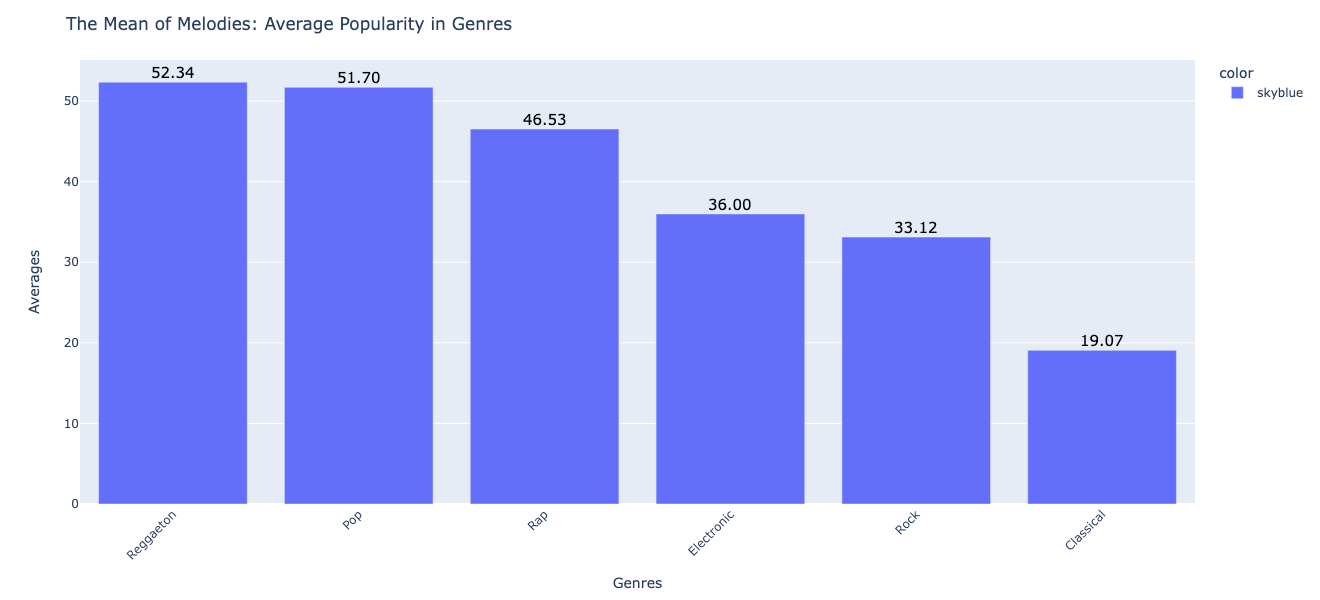

In [10]:
# Sort the average/mean values in descending order
sorted_mean_values_for_popularity = mean_values_of_features.sort_values('popularity',ascending=False)

print("Mean values of features sorted in descending order:")
print(sorted_mean_values_for_popularity['popularity'])


# Extracting the sorted mean values for 'popularity'
popularity_mean_sorted = sorted_mean_values_for_popularity['popularity']


# Define colors for the bars
colors = ['skyblue' if x != 'popularity' else 'salmon' for x in popularity_mean_sorted.index]

# Create a bar chart using the sorted mean values for 'popularity'
fig = px.bar(x=popularity_mean_sorted.index, y=popularity_mean_sorted, color=colors)

# Add labels and title
fig.update_layout(
    xaxis_title='Genres',
    yaxis_title='Averages',
    title='The Mean of Melodies: Average Popularity in Genres',
    xaxis_tickangle= -45,  # Rotate x-axis labels for better visibility
    height=600,  # Adjust the height of the chart
    width=1200    # Adjust the width of the chart
    
)

# Add labels for the percentage on top of each bar
for i, mean_value in enumerate(popularity_mean_sorted):
    fig.add_annotation(
        x=popularity_mean_sorted.index[i],
        y=mean_value,
        text=f'{mean_value:.2f}',
        font=dict(color='black', size=15), #change size of percentage
        showarrow=False,
        yshift=10 #change distance between bar and % number
    )

# Show plot
fig.show()

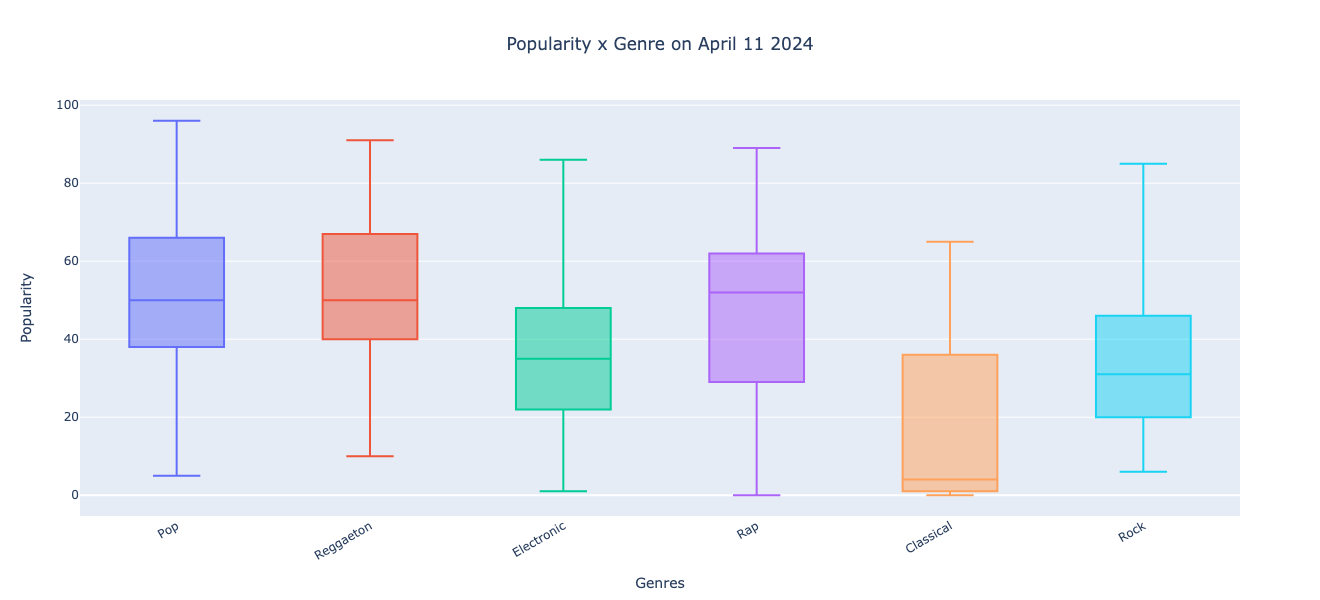

In [11]:
# Box plot
box_plot = px.box(df, x='Genre', y='popularity', color='Genre',
                  title='Popularity x Genre on April 11 2024',
                  labels={'Genre': 'Genres', 'popularity': 'Popularity'}) # second is the label

# Update layout
box_plot.update_layout(
    showlegend=False, 
    height=600, 
    width=1200,  
    title_x=0.5  # Center title
)

# Rotate x-axis tick labels diagonally
box_plot.update_layout(
    xaxis=dict(
        tickangle=-30,
        tickmode='array',
        tickvals=list(range(len(df['Genre'].unique()))),
        ticktext=list(df['Genre'].unique())
    )
)

# Show the box plot
box_plot.show()

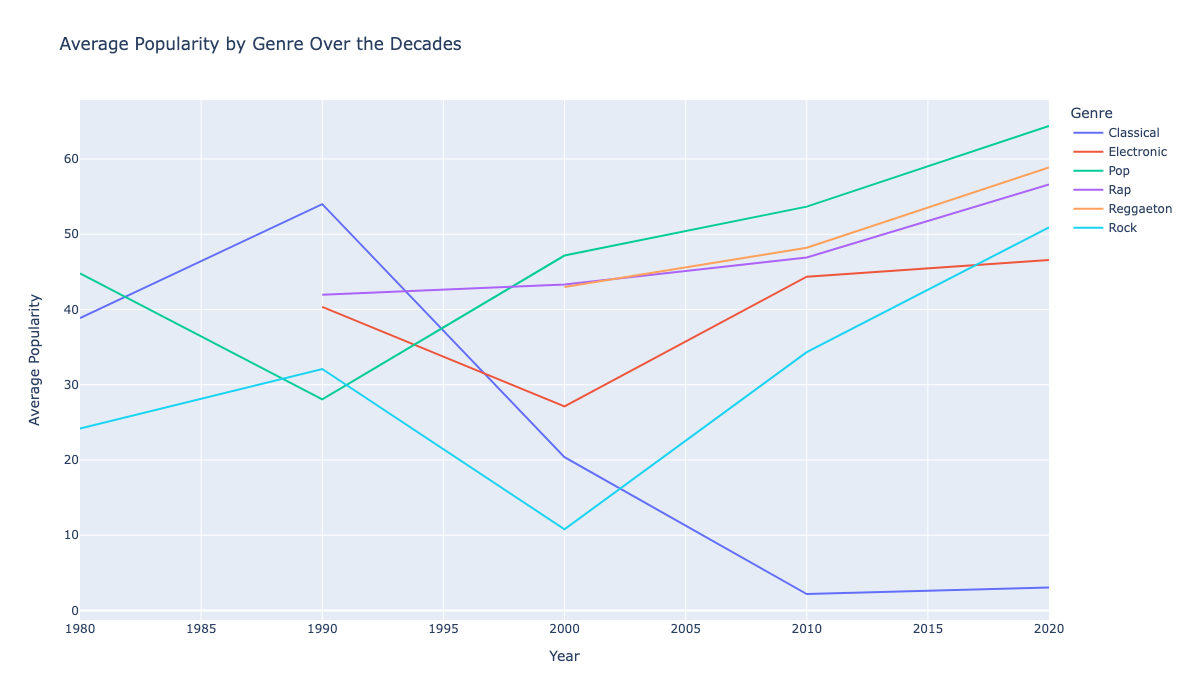

In [25]:
import pandas as pd

# Convert 'Release Year' to datetime format if it's not already
df['Release Year'] = pd.to_datetime(df['Release Year'], format='%Y')

# Filter the DataFrame to include only records from 1980 to 2024
filtered_df = df[(df['Release Year'].dt.year >= 1980) & (df['Release Year'].dt.year <= 2024)].copy()

# Calculate the decade for each release year
filtered_df.loc[:, 'Year'] = (filtered_df['Release Year'].dt.year // 10) * 10

# Group by 'Genre' and 'Decade' and calculate mean popularity
mean_popularity_by_genre_decade = filtered_df.groupby(['Year', 'Genre'])['popularity'].mean().unstack().reset_index()

# Melt the DataFrame to long format for plotting
mean_popularity_melted = mean_popularity_by_genre_decade.melt(id_vars='Year', var_name='Genre', value_name='Average Popularity')

# Plotting
fig = px.line(mean_popularity_melted, x='Year', y='Average Popularity', color='Genre', 
              title='Average Popularity by Genre Over the Decades',
              labels={'Year': 'Year', 'Average Popularity': 'Average Popularity', 'Genre': 'Genre'})

# Adjust size of the chart
fig.update_layout(
    height=700,  # Set the height of the chart
    width=1200    # Set the width of the chart
)

fig.show()


# Correlation

In [13]:
# Select numerical columns
numerical_df= df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

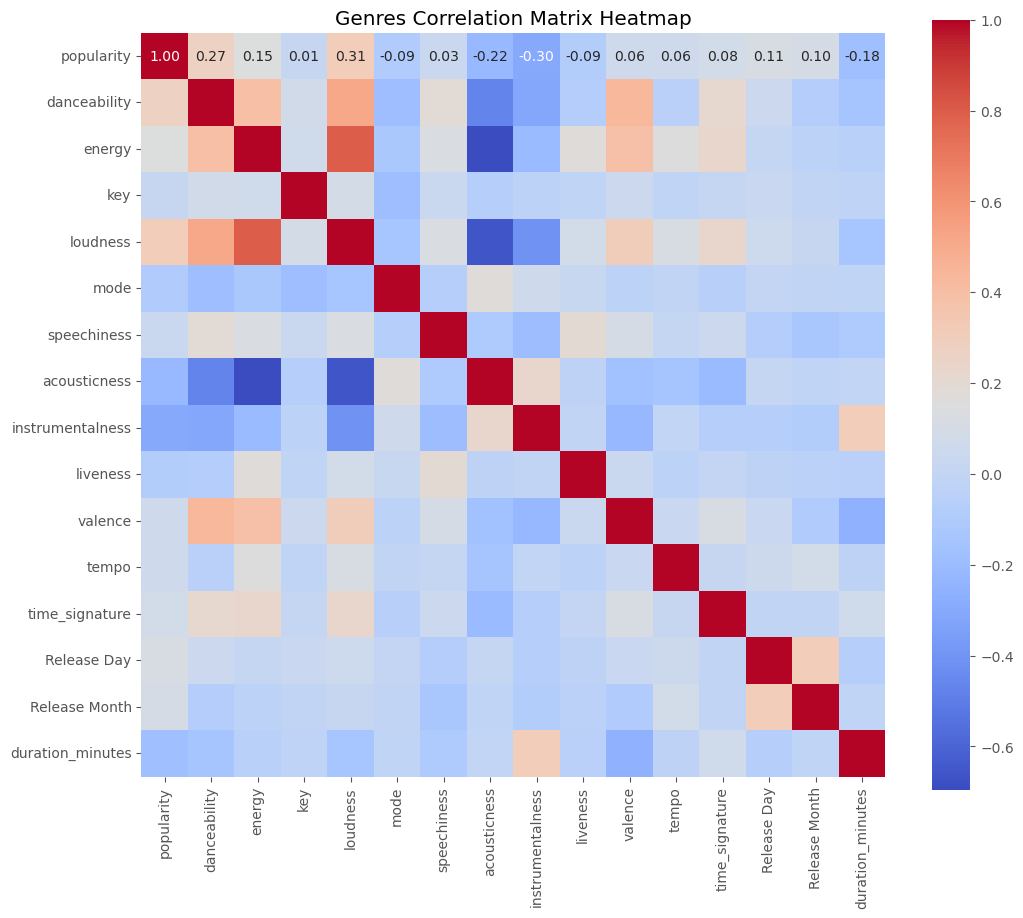

In [14]:
# Plot heatmap

# Create a new figure with a specified size (12 inches wide and 10 inches tall)
fig = plt.figure(figsize=(12, 10))

# Get the current Axes instance of the figure
ax = fig.gca()

# Plot the heatmap using seaborn's heatmap function
# correlation_matrix: the data to be plotted, assumed to be a correlation matrix
# annot=True: annotate each cell with the numeric value
# fmt=".2f": format for annotations, displaying two decimal places
# cmap='coolwarm': color map for the heatmap (cool to warm colors)
# ax=ax: plot the heatmap on the specified Axes instance
# annot_kws={"size": 10}: set the font size of the annotations to 10
# square=True: ensure the aspect ratio of the plot is square
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax, annot_kws={"size": 10}, square=True)

# Add a title to the plot
plt.title('Genres Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [15]:
# Create dummy variables for specified values in 'Artists'
key_name_dummies = pd.get_dummies(df['Genre'], prefix='', prefix_sep='', columns=['Pop', 'Reggaeton',
                                                                                  'Electronic', 'Rap',
                                                                                  'Classical', 'Rock'], dtype='int')
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df, key_name_dummies], axis=1)

df_encoded.shape

(3942, 33)

# LR

In [16]:
import sklearn as skl
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Feature matrix and target vector respectively
X = df_encoded.select_dtypes(['float', 'int'])
y = df_encoded['popularity']

X = X.drop(columns=['popularity'])

# popularity is gone 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942 entries, 0 to 3941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3942 non-null   float64
 1   energy            3942 non-null   float64
 2   key               3942 non-null   float64
 3   loudness          3942 non-null   float64
 4   mode              3942 non-null   float64
 5   speechiness       3942 non-null   float64
 6   acousticness      3942 non-null   float64
 7   instrumentalness  3942 non-null   float64
 8   liveness          3942 non-null   float64
 9   valence           3942 non-null   float64
 10  tempo             3942 non-null   float64
 11  time_signature    3942 non-null   float64
 12  Release Day       3942 non-null   int64  
 13  Release Month     3942 non-null   int64  
 14  duration_minutes  3942 non-null   float64
 15  Classical         3942 non-null   int64  
 16  Electronic        3942 non-null   int64  


In [17]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a list of alpha values to try for Lasso and Ridge regression
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Store results
results = []

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_pred = linear_reg.predict(X_test_scaled)
linear_r2 = r2_score(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mape = np.mean(np.abs((y_test - linear_pred) / y_test)) * 100

results.append({
    'Model': 'Linear Regression',
    'R2 Score': linear_r2,
    'MSE': linear_mse,
    'MAPE': linear_mape
})

# Lasso Regression
for alpha in alpha_values:
    lasso = Lasso(alpha=0.1, max_iter=1000, random_state=42) 
    lasso.fit(X_train_scaled, y_train)
    lasso_pred = lasso.predict(X_test_scaled)
    lasso_r2 = r2_score(y_test, lasso_pred)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

    results.append({
        'Model': f'Lasso (alpha={alpha})',
        'R2 Score': lasso_r2,
        'MSE': lasso_mse,
        'MAPE': lasso_mape
    })

# Ridge Regression
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_pred = ridge.predict(X_test_scaled)
    ridge_r2 = r2_score(y_test, ridge_pred)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mape = np.mean(np.abs((y_test - ridge_pred) / y_test)) * 100
    
    results.append({
        'Model': f'Ridge (alpha={alpha})',
        'R2 Score': ridge_r2,
        'MSE': ridge_mse,
        'MAPE': ridge_mape
    })

In [18]:
# Convert results to DataFrame for easier visualization
results_rock_df_one = pd.DataFrame(results)

# Print results
print(results_rock_df_one)

                  Model  R2 Score         MSE  MAPE
0     Linear Regression  0.259514  314.136158   inf
1   Lasso (alpha=0.001)  0.257162  315.133855   inf
2    Lasso (alpha=0.01)  0.257162  315.133855   inf
3     Lasso (alpha=0.1)  0.257162  315.133855   inf
4       Lasso (alpha=1)  0.257162  315.133855   inf
5      Lasso (alpha=10)  0.257162  315.133855   inf
6     Lasso (alpha=100)  0.257162  315.133855   inf
7   Ridge (alpha=0.001)  0.257949  314.799963   inf
8    Ridge (alpha=0.01)  0.257949  314.799939   inf
9     Ridge (alpha=0.1)  0.257950  314.799695   inf
10      Ridge (alpha=1)  0.257955  314.797266   inf
11     Ridge (alpha=10)  0.258010  314.774329   inf
12    Ridge (alpha=100)  0.258274  314.662303   inf


# Lasso

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.245e+03, tolerance: 1.099e+02

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.174e+03, tolerance: 1.105e+02

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.876e+03, tolerance: 1.084e+02

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model

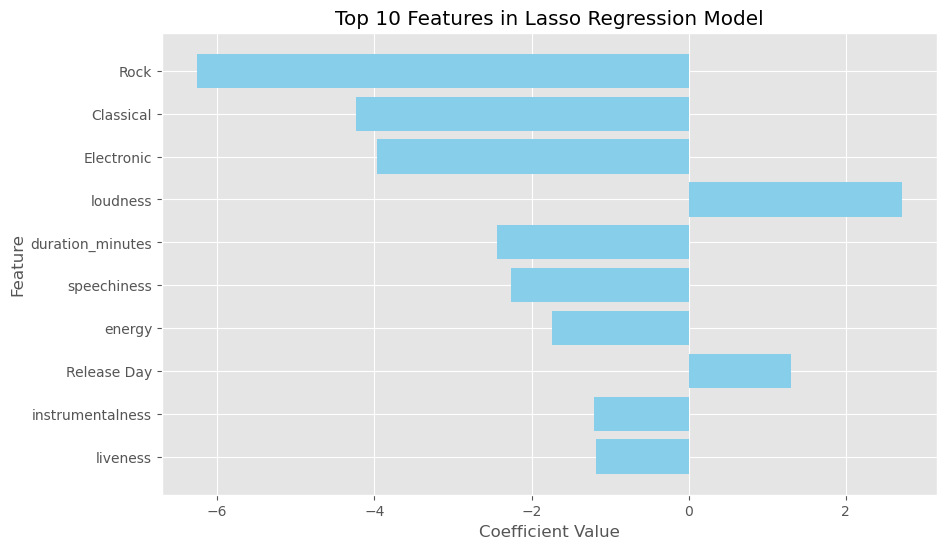

Test Score: 0.2579296838033063
MSE Score: 314.8081972007788


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Lasso regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['lasso'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Lasso Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

# Ridge 

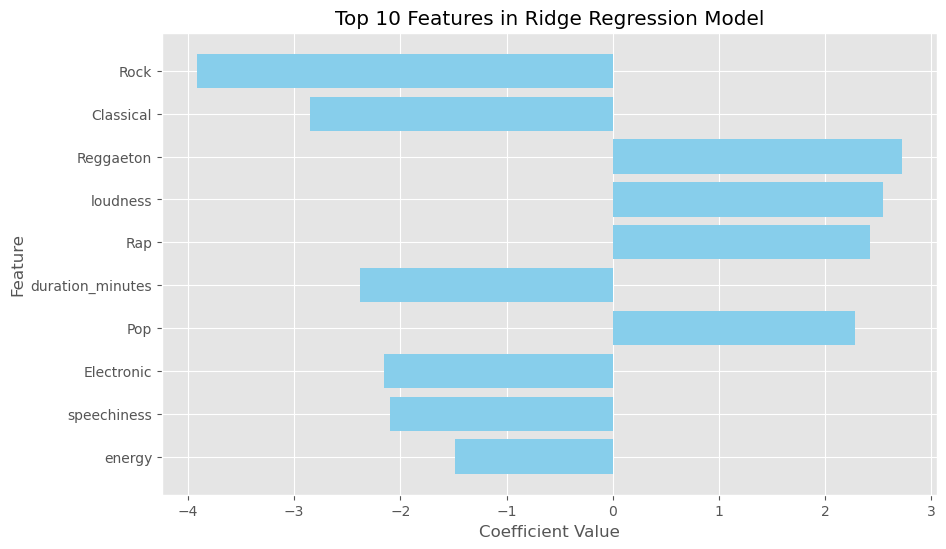

Test Score: 0.2582735886064582
MSE Score: 314.66230260194374


In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline with StandardScaler and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define parameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Example alpha values to search over
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Evaluate test score
test_score = best_model.score(X_test, y_test)

# Get coefficients and corresponding feature names from best model
coefficients = best_model.named_steps['ridge'].coef_
feature_names = X.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort coefficients by absolute value
coefficients_df['Abs_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select top 10 coefficients
top_10_coefficients = coefficients_df.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_coefficients['Feature'], top_10_coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features in Ridge Regression Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest coefficients on top
plt.show()

print("Test Score:", test_score)
y_pred = best_model.predict(X_test)

# Calculate MSE score
mse = mean_squared_error(y_test, y_pred)

# Print scores
print("MSE Score:", mse)

In [1]:
# Chart not used

In [3]:
# Calculate the decade for each release year
#df['Decade'] = (df['Release Year'].dt.year // 10) * 10

# Group by 'Genre' and 'Decade' and calculate mean popularity
#mean_popularity_by_genre_decade = df.groupby(['Decade', 'Genre'])['popularity'].mean().unstack().reset_index()

# Melt the DataFrame to long format for plotting
#mean_popularity_melted = mean_popularity_by_genre_decade.melt(id_vars='Decade', var_name='Genre', value_name='Average Popularity')

# Plotting
#fig = px.line(mean_popularity_melted, x='Decade', y='Average Popularity', color='Genre', 
            #  title='Average Popularity by Genre Over the Decades',
             # labels={'Decade': 'Decade', 'Average Popularity': 'Average Popularity', 'Genre': 'Genre'})

# Adjust size of the chart
#fig.update_layout(
   # height=700,  # Set the height of the chart
    #width=1200    # Set the width of the chart
#)
#
#fig.show()